In [28]:
#import necessary packages

from bs4 import BeautifulSoup
import requests
import pandas as pd
import requests
import traceback
import re


In [84]:
url_list = ['https://d-scholarship.pitt.edu/view/year/1957.html', 
            'https://d-scholarship.pitt.edu/view/year/1955.html', 
            'https://d-scholarship.pitt.edu/view/year/1954.html', 
            'https://d-scholarship.pitt.edu/view/year/1953.html', 
            'https://d-scholarship.pitt.edu/view/year/1952.html', 
            'https://d-scholarship.pitt.edu/view/year/1951.html',  
            'https://d-scholarship.pitt.edu/view/year/1950.html', 
            'https://d-scholarship.pitt.edu/view/year/1949.html', 
            'https://d-scholarship.pitt.edu/view/year/1934.html', 
            'https://d-scholarship.pitt.edu/view/year/0202.html']  # add additonal object manually, if needed
for y in range(1959,2023):
    url = f"https://d-scholarship.pitt.edu/view/year/{y}.html"
    url_list.append(url)
    
    
url_list

['https://d-scholarship.pitt.edu/view/year/1957.html',
 'https://d-scholarship.pitt.edu/view/year/1955.html',
 'https://d-scholarship.pitt.edu/view/year/1954.html',
 'https://d-scholarship.pitt.edu/view/year/1953.html',
 'https://d-scholarship.pitt.edu/view/year/1952.html',
 'https://d-scholarship.pitt.edu/view/year/1951.html',
 'https://d-scholarship.pitt.edu/view/year/1950.html',
 'https://d-scholarship.pitt.edu/view/year/1949.html',
 'https://d-scholarship.pitt.edu/view/year/1934.html',
 'https://d-scholarship.pitt.edu/view/year/0202.html',
 'https://d-scholarship.pitt.edu/view/year/1959.html',
 'https://d-scholarship.pitt.edu/view/year/1960.html',
 'https://d-scholarship.pitt.edu/view/year/1961.html',
 'https://d-scholarship.pitt.edu/view/year/1962.html',
 'https://d-scholarship.pitt.edu/view/year/1963.html',
 'https://d-scholarship.pitt.edu/view/year/1964.html',
 'https://d-scholarship.pitt.edu/view/year/1965.html',
 'https://d-scholarship.pitt.edu/view/year/1966.html',
 'https://

In [30]:
# Scrape the data on web page

In [85]:
# Test usage

test = "https://d-scholarship.pitt.edu/view/year/2022.html"
test_r = requests.get(test)
test_source = test_r.content
test_soup = BeautifulSoup(test_source, 'html.parser')
test_class_people = test_soup.find(class_="ep_view_page ep_view_page_view_year").find_all('p')

test_yearly_list = []
for peo in test_class_people:
    test_element = peo.text
    test_split_result = [x.strip() for x in test_element.split("\n")]
    
    test_author = test_split_result[1]
    test_year = test_split_result[4]
    test_thesis = test_split_result[6]
    
    test_yearly_list.append([test_author, test_year, test_thesis])

test_sub_df = pd.DataFrame(columns=['Author', 'Year', 'Title'], data=test_yearly_list)




In [32]:
m_page = r"https://d-scholarship.pitt.edu/view/year/"
mr = requests.get(m_page)
msource = mr.content
msoup = BeautifulSoup(msource, 'html.parser')
year_list = msoup.find(class_='ep_view_menu').find_all('a')

year_list_str = []
for s in year_list:
    st = s.text
    year_list_str.append(st)

st

'Not Specified'

In [86]:
# Construct a empty dataframe


thesis_df = pd.DataFrame(columns=['Author', 'Year', 'Title'])

# Input the url 1 by 1 and get each source page and soup
for u in url_list:
    
    r = requests.get(u) 
    source = r.content
    soup = BeautifulSoup(source, 'html.parser')
    # Find the element we are looking for (2 levels finding method)
    class_people = soup.find(class_="ep_view_page ep_view_page_view_year").find_all('p')
    
    
    # Convert the soup into string and clean it
    yearly_list = []
    for people in class_people:
        element = people.text
        split_result = [y.strip() for y in element.split("\n")]

        author = split_result[1]
      
        year = split_result[4]
      
        thesis = split_result[6]
     

        yearly_list.append([author, year, thesis])
        
    sub_df = pd.DataFrame(columns=['Author', 'Year', 'Title'], data=yearly_list)
    thesis_df = pd.concat([thesis_df, sub_df], axis=0, ignore_index=True)
    print(f"url: {u} scaped successfully!")




yearly_list      

        
        

url: https://d-scholarship.pitt.edu/view/year/1957.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1955.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1954.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1953.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1952.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1951.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1950.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1949.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1934.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/0202.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1959.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1960.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1961.html scaped successfully!

[['Abbott, Kellie G.',
  '(2022)',
  "Being Seen: An Analysis of Fifth Grade Language Arts Textbooks' Representation of Children Experiencing Homelessness."],
 ['Abidi, Collin',
  '(2022)',
  'Maintaining Communication at Scale with OpenSHMEM.'],
 ['Abror, Grace N.',
  '(2022)',
  'The Association of Sexual Behavior with Systemic Inflammation and Increased HIV-1 Susceptibility in MSM.'],
 ['Afrin, Tazin',
  '(2022)',
  'Desirable revisions of evidence and reasoning for argumentative writing.'],
 ['Ahlstrom, Tyler',
  '(2022)',
  'The Role of Ring Strain in the Reactivity of Transition Metal-Catalyzed C–C Bond Activation Reactions.'],
 ['Ahmed, Yasmine',
  '(2022)',
  'Towards the Automation of Expanding Dynamic Network Models with Knowledge from Literature.'],
 ['Ahumada, Beatriz and Chen, Yufei and Gupta, Neeraja and Hyde, Kelly and Lepper, Marissa and Mathews, Will and Neil, Silveus and Vesterlund, Lise and Weidman, Taylor and Wilson, Alistair and Winichakul, K. Pun and Zhou, Liyang'

In [92]:
thesis_df.sample(50)
thesis_df

,Author,Year,Title
0,"Cooke, Francis N and Kurzweg, Frank Turner and...",(1957),Blood Vessel Bank: Organization and Function.
1,"STARZL, TE and BROADWAY, RK and DEVER, RC and ...",(1957),The management of penetrating wounds of the in...
2,"STARZL, TE and GAERTNER, RA",(1955),Chronic heart block in dogs; a method for prod...
3,"STARZL, TE and GAERTNER, RA and BAKER, RR",(1955),Acute complete heart block in dogs.
4,"STARZL, TE and GAERTNER, RA and WEBB, RC",(1955),The effects of repetitive electric cardiac sti...
...,...,...,...
24791,"Zhu, Xinran",(2022),Women's occupational health: The impact of dys...
24792,"Zhu, Xiyu",(2022),Adolescent stress-sensitive periods and dopami...
24793,"Zhu, Yunye",(2022),"Determination of DNA sequence, Pol II catalyti..."
24794,"Zik, Cary L",(2022),Prevalence of Comorbidities in Middle-Aged and...


In [97]:
new_df = thesis_df
new_df.loc[new_df.Year=='(0202)'] = '(2020)'
    
year_grp = new_df.groupby('Year', as_index=False)
year_df = pd.DataFrame(year_grp['Title'].agg('count'))
year_df['Year'] = [int(x.strip('()')) for x in year_df['Year']]
year_df.rename(columns={'Title': 'Yearly_count'}, inplace=True)
year_df.sort_values(by=['Year'])
year_df['Acc_count'] = year_df['Yearly_count'].cumsum()
year_df

,Year,Yearly_count,Acc_count
0,1934,1,1
1,1949,1,2
2,1950,1,3
3,1951,3,6
4,1952,1,7
...,...,...,...
68,2018,982,21283
69,2019,949,22232
70,2020,962,23194
71,2021,861,24055


In [44]:
s_page = r"https://d-scholarship.pitt.edu/view/divisions/"
sr = requests.get(s_page)
ssource = sr.content
ssoup = BeautifulSoup(ssource, 'html.parser')
department_year_list = msoup.find(class_='ep_view_intro').find_all('a')



department_year_list

[]

In [9]:
##Plot number papers by year.

In [98]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

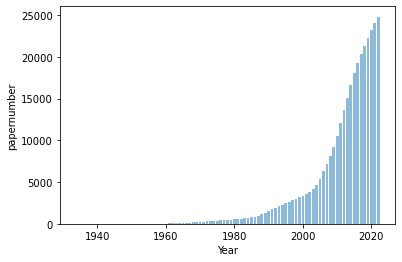

In [100]:
plt.bar(year_df['Year'], year_df['Acc_count'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('papernumber')
plt.show()

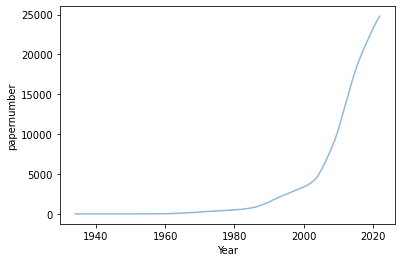

In [101]:
plt.plot(year_df['Year'], year_df['Acc_count'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('papernumber')
plt.show()

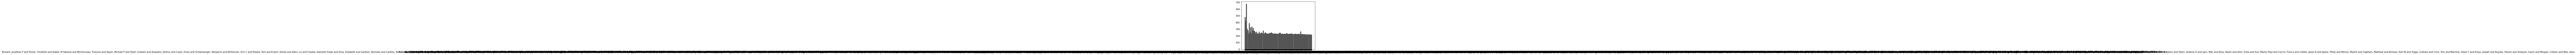

In [20]:
plt.hist(thesis_df['Author'], bins = 100, facecolor='gray', edgecolor='black')
plt.show()

In [15]:

department = "https://d-scholarship.pitt.edu/view/divisions/divisions/"
department_r = requests.get(department)
department_source = department_r.content
department_soup = BeautifulSoup(department_source, 'html.parser')

department_class = department_soup.find(class_="ep_toolbox_content").find_all("a")



department_yearly_list=['https://d-scholarship.pitt.edu/view/divisions/sch=5Fcba/', 
                            'https://d-scholarship.pitt.edu/view/divisions/sch=5Fcgs/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fuhc/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fas/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Ffas/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fgspia/',  
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fbus/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fcompinfo/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fdm/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fedu/']
for dep in department_class:
    department_element = dep.text
    department_split_result = [x.strip('..') for x in department_element.split("\n")]
    department_yearly_list.append(dep['href'])
    url_department = f"https://d-scholarship.pitt.edu/view/divisions/{dep['href']}.html"
    department_yearly_list.append( url_department)    
    
    



department_school = []
for d in department_class:
        dp = d.text
        department_school .append(dp)
    




In [103]:
import pandas as pd
df_school = pd.read_excel("schoolnumber.xlsx")
print(df_school)

                                          school_name  paper_number
0                  College of Business Administration            45
1                          College of General Studies             3
2                   David C. Frederick Honors College           442
3                Dietrich School of Arts and Sciences          6884
4                        Faculty of Arts and Sciences            28
5   Graduate School of Public and International Af...           166
6          Joseph M. Katz Graduate School of Business           247
7                 School of Computing and Information           251
8                           School of Dental Medicine           365
9                                 School of Education          1148
10       School of Health and Rehabilitation Sciences          1076
11                     School of Information Sciences          1396
12                                      School of Law           200
13                                  School of Nu

In [107]:
df_school['rank'] = df_school['paper_number'].rank(ascending=False).astype(int)
df_school_ord = df_school.sort_values(by="rank",ignore_index=True)
df_school_ord

,school_name,paper_number,rank
0,Dietrich School of Arts and Sciences,6884,1
1,School of Nursing,3638,2
2,School of Public Health,3428,3
3,Swanson School of Engineering,2591,4
4,School of Information Sciences,1396,5
5,School of Education,1148,6
6,School of Health and Rehabilitation Sciences,1076,7
7,David C. Frederick Honors College,442,8
8,University libraries,398,9
9,School of Dental Medicine,365,10


## sns.displot(df_school, x="rank", kind="kde", bw_adjust=2)

In [18]:
df_school['paper_number'] = 1 
df_school.head(30)


,school_name,paper_number,rank
0,College of Business Administration,1,18.0
1,College of General Studies,1,23.0
2,David C. Frederick Honors College,1,8.0
3,Dietrich School of Arts and Sciences,1,1.0
4,Faculty of Arts and Sciences,1,19.0
5,Graduate School of Public and International Af...,1,16.0
6,Joseph M. Katz Graduate School of Business,1,14.0
7,School of Computing and Information,1,12.0
8,School of Dental Medicine,1,10.0
9,School of Education,1,6.0
